In [6]:
#-- 리스트 8-2-(1)
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

In [7]:
# - 리스트 8-1-(2)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#-- 리스트 8-1-(7)
def show_prediction():
    n_show = 96
    y = model.predict(x_test) # (A)
    plt.figure(2, figsize=(12, 8))
    plt.gray()
    for i in range(n_show):
        plt.subplot(8, 12, i + 1)
        x = x_test[i, :]
        x = x.reshape(28, 28)
        plt.pcolor(1 - x)
        wk = y[i, :]
        prediction = np.argmax(wk)
        plt.text(22, 25.5, "%d" % prediction, fontsize=12)
        if prediction != np.argmax(y_test[i, :]):
            plt.plot([0, 27], [1, 1], color='cornflowerblue', linewidth=5)
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")
        plt.yticks([], "")

In [18]:
import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
import time


model = Sequential()

model.add(Conv2D(6, (5, 5),strides = (1,1), padding='same', input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2))) # (A)

model.add(Conv2D(16, (5, 5),strides = (1,1),padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2))) # (B)

model.add(Conv2D(120, (5, 5),strides=(1,1),padding='valid', activation='relu'))

model.add(Flatten())

model.add(Dense(84, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])


startTime = time.time()


history = model.fit(x_train, y_train, batch_size=1000, epochs=5,
                    verbose=1, validation_data=(x_test, y_test))


score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 91us/step - loss: 1.0594 - accuracy: 0.7385 - val_loss: 0.2865 - val_accuracy: 0.9194
Epoch 2/5
60000/60000 [==============================] - 5s 88us/step - loss: 0.2298 - accuracy: 0.9326 - val_loss: 0.1574 - val_accuracy: 0.9519
Epoch 3/5
60000/60000 [==============================] - 5s 89us/step - loss: 0.1483 - accuracy: 0.9553 - val_loss: 0.1138 - val_accuracy: 0.9669
Epoch 4/5
60000/60000 [==============================] - 5s 88us/step - loss: 0.1160 - accuracy: 0.9642 - val_loss: 0.0945 - val_accuracy: 0.9731
Epoch 5/5
60000/60000 [==============================] - 5s 88us/step - loss: 0.0960 - accuracy: 0.9715 - val_loss: 0.0867 - val_accuracy: 0.9751
Test loss: 0.08666243730559946
Test accuracy: 0.9750999808311462
Computation time:27.876 sec


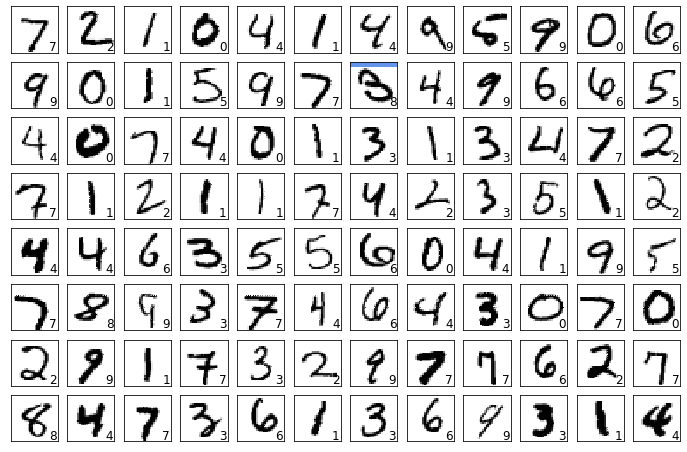

In [17]:
# 리스트 8-2-(7)
show_prediction()
plt.show()